In [8]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True, precision = 2)

nba = pd.read_csv('./nba_games.csv')

            game_id  year_id  fran_id      opp_fran game_location  \
21717  200910270CLE     2010  Celtics     Cavaliers             A   
21718  200910280BOS     2010  Celtics       Hornets             H   
21719  200910280MIA     2010   Knicks          Heat             A   
21720  200910280MIN     2010     Nets  Timberwolves             A   
21721  200910280OKC     2010  Thunder         Kings             H   

       is_playoffs  pts  opp_pts game_result  forecast  point_diff  
21717            0   95       89           W  0.277472           6  
21718            0   92       59           W  0.814619          33  
21719            0   93      115           L  0.258755         -22  
21720            0   93       95           L  0.475155          -2  
21721            0  102       89           W  0.716764          13  
            game_id  year_id  fran_id   opp_fran game_location  is_playoffs  \
23468  201310300CLE     2014     Nets  Cavaliers             A            0   
23469  201310

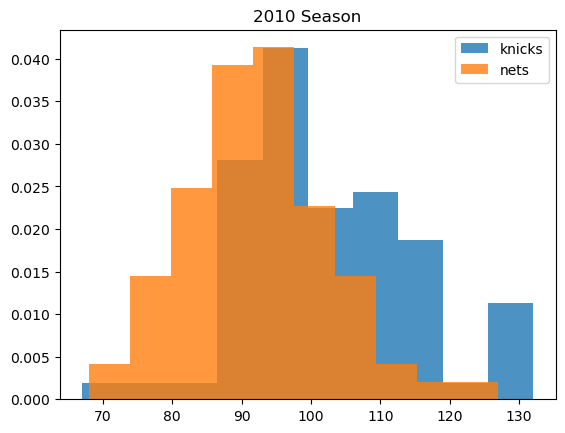

In [16]:
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

print(nba_2010.head())
print(nba_2014.head())

knicks_pts_10 = nba_2010.pts[nba_2010.fran_id == 'Knicks']
nets_pts_10 = nba_2010.pts[nba_2010.fran_id == 'Nets']
knicks_mean = np.mean(knicks_pts_10)
nets_mean = np.mean(nets_pts_10)
diff_means_2010 = knicks_mean - nets_mean
print(diff_means_2010)


plt.hist(knicks_pts_10, alpha=0.8, density = True, label='knicks')
plt.hist(nets_pts_10, alpha=0.8, density = True, label='nets')
plt.legend()
plt.title("2010 Season")
plt.show()


0.44706798131809933


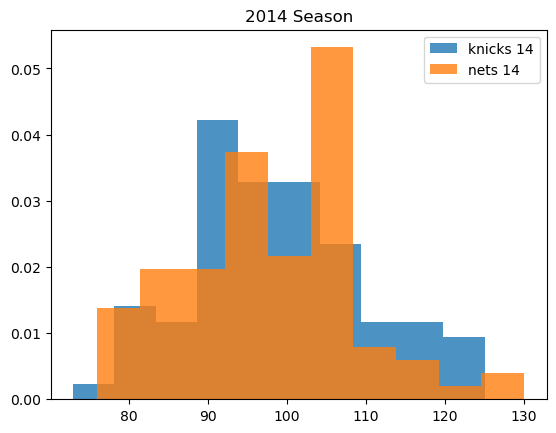

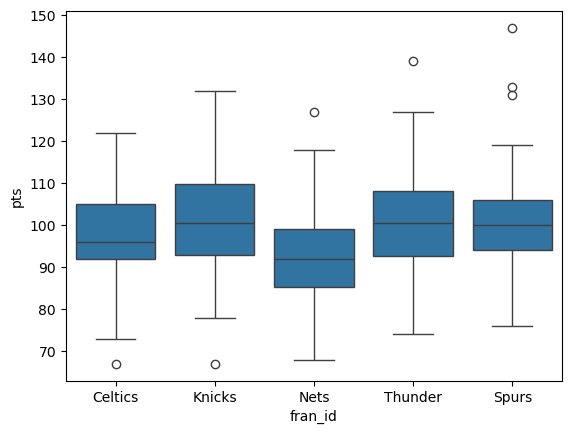

In [22]:
knicks_pts_14 = nba_2014.pts[nba_2014.fran_id == 'Knicks']
nets_pts_14 = nba_2014.pts[nba_2014.fran_id == 'Nets']
knicks_mean_14 = np.mean(knicks_pts_14)
nets_mean_14 = np.mean(nets_pts_14)
diff_means_2014 = knicks_mean_14 - nets_mean_14
print(diff_means_2014)


plt.hist(knicks_pts_14, alpha=0.8, density = True, label='knicks 14')
plt.hist(nets_pts_14, alpha=0.8, density = True, label='nets 14')
plt.legend()
plt.title("2014 Season")
plt.show()
plt.clf()
sns.boxplot(data = nba_2010, x = 'fran_id', y = 'pts')
plt.show()




In [24]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
print(location_result_freq)
location_result_proportions = location_result_freq/len(nba_2010)
print(location_result_proportions)

chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(expected)
print(chi2)

point_diff_forecast_cov = np.cov(nba_2010.forecast, nba_2010.point_diff)

print(point_diff_forecast_cov)
point_diff_forecast_corr = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_corr)




game_location    A    H
game_result            
L              133  105
W               92  120
game_location         A         H
game_result                      
L              0.295556  0.233333
W              0.204444  0.266667
[[119. 119.]
 [106. 106.]]
6.501704455367053
[[  0.05   1.37]
 [  1.37 186.56]]
PearsonRResult(statistic=0.44020887084680815, pvalue=9.41039157313972e-23)


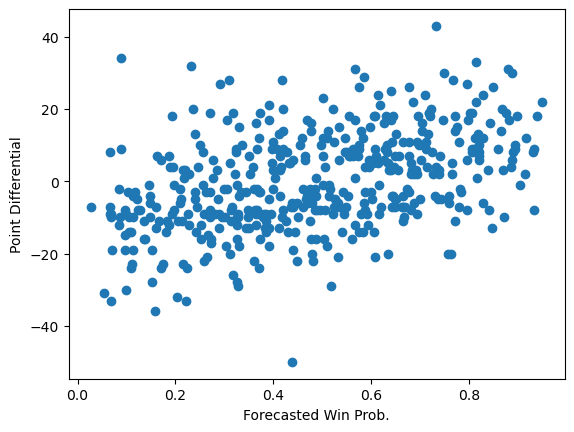

In [26]:
plt.clf() 
plt.scatter('forecast', 'point_diff', data=nba_2010)
plt.xlabel('Forecasted Win Prob.')
plt.ylabel('Point Differential')
plt.show()